/Users/rachitkumarsingh/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/rachitkumarsingh/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rachitkumarsingh/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rachitkumarsingh/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rachitkumarsingh/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412:

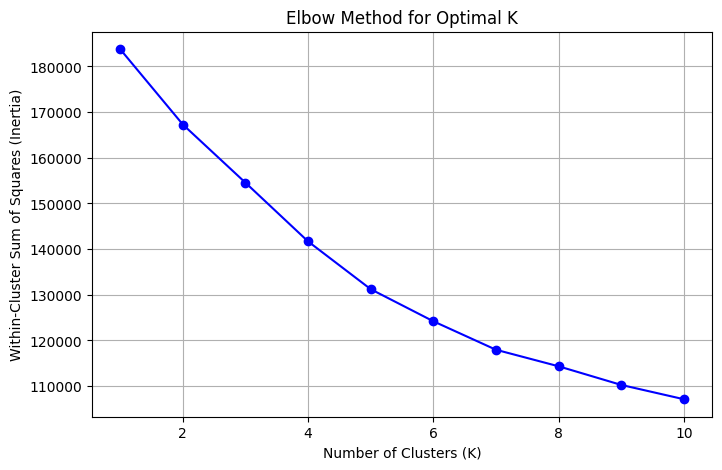

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load and preprocess your data
df = pd.read_csv('../Data/Random_sampled.csv')
X = df.drop('Reached', axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the within-cluster sum of squares (inertia) for different values of K
inertia = []
k_values = range(1, 11)  # You can adjust the range as needed

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Load and preprocess your data
df = pd.read_csv('../Data/Encoded_data.csv')
X = df.drop('Reached', axis=1)
y = df['Reached']

# Define a list of resampling methods
resampling_methods = ["Imbalanced Data", "Random Oversampling", "SMOTE", "Capped Outliers"]

# Define a dictionary to store clustering results
cluster_results = {}

# Loop through each resampling method
for method in resampling_methods:
    # Apply resampling method to X and y
    if method == "Imbalanced Data":
        X_resampled = X
        y_resampled = y
    elif method == "Random Oversampling":
        ros = RandomOverSampler(sampling_strategy="auto", random_state=42)
        X_resampled, y_resampled = ros.fit_resample(X, y)
    elif method == "SMOTE":
        smote = SMOTE(sampling_strategy="auto", random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)
    elif method == "Capped Outliers":
        X_resampled = X.copy()
        for col in X_resampled.columns:
            std_dev = X_resampled[col].std()
            X_resampled[col] = np.where(X_resampled[col] > 3 * std_dev, 3 * std_dev, X_resampled[col])
        y_resampled = y

    # Standardize the resampled data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_resampled)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

    # Define a list of K values for K-Means
    k_values = [2, 3, 4, 5, 6]

    # Define a dictionary to store clustering results for the current resampling method
    method_cluster_results = {}

    # Loop through each K value and fit K-Means
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_train)

        # Predict cluster labels for the test set
        cluster_labels = kmeans.predict(X_test)

        # Calculate clustering metrics (Silhouette Score, Davies-Bouldin Score, Calinski-Harabasz Score)
        silhouette = silhouette_score(X_test, cluster_labels)
        davies_bouldin = davies_bouldin_score(X_test, cluster_labels)
        calinski_harabasz = calinski_harabasz_score(X_test, cluster_labels)

        # Store the clustering results for the current resampling method and K value
        method_cluster_results[k] = {
            "Silhouette Score": silhouette,
            "Davies-Bouldin Score": davies_bouldin,
            "Calinski-Harabasz Score": calinski_harabasz
        }

    # Store the clustering results for the current resampling method in the overall dictionary
    cluster_results[method] = method_cluster_results

# Create a DataFrame from the clustering results
cluster_results_df = pd.DataFrame(cluster_results)

# Plot a heatmap of clustering metrics
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_results_df, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title("Clustering Metrics Heatmap (K-Means)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Metrics")
plt.xticks(rotation=10)
plt.show()
